In [36]:
%matplotlib inline
import GPy
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display

In [41]:
# Quasi-periodic kernel: shape of periodic component can drift over the decades
k = GPy.kern.PeriodicMatern52(input_dim=1,lengthscale=0.2, period=1) * GPy.kern.Matern52(input_dim=1, lengthscale=10)

# Add a nonperiodic kernel to account for slow-ish trends
k = k + GPy.kern.Matern52(input_dim=1, lengthscale=5, variance=.25)

In [42]:
X = np.linspace(0.,10,500) # 500 points evenly spaced over [0,1]
X = X[:,None] # reshape X to make it n*D
Y = X

In [43]:
mu = np.zeros((500)) # vector of the means
C = k.K(X,X) # covariance matrix
np.fill_diagonal(C, C.diagonal() + C.diagonal() * 1E-6) # Ensure positive semidefinite

n_draws = 5

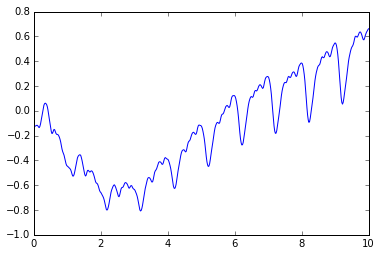

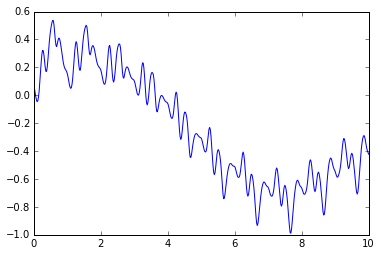

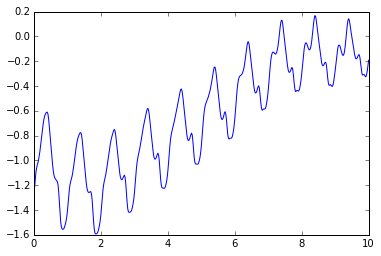

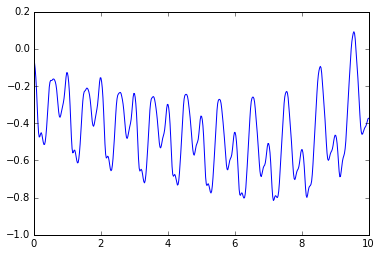

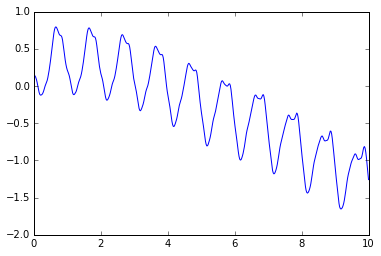

In [46]:
# Examples of random draws from the covariance function
Z = np.random.multivariate_normal(mu,C,n_draws)
for i in range(n_draws):
    plt.figure()
    plt.plot(X[:],Z[i,:])

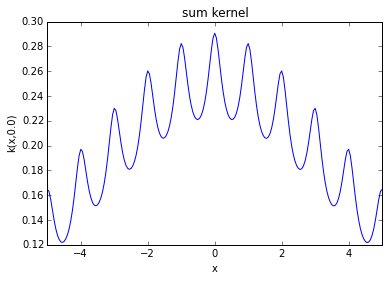

In [45]:
k.plot()